<a href="https://colab.research.google.com/github/bfabrin/Watershed-Challenge/blob/main/Bain_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Watershed Challenge

The heat waves are extreme meteorological events (extreme temperatures) which can impact negatively in our ecosystem. This situation can have multiple impacts; from very hot summer days and wildfires, to floods and alluviums. As the heat waves depend on atmospheric circulation phenomenas, which can be detected few days in advance, there is a big opportunity for trying to predict the occurrence of the negative impacts associated with it. This is key in the context of global warming, where the frequency of this events have grown in the last century (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL053361). We can explore the opportunity of predicting heat waves, in particular the peak-flows events, using a Chilean monitoring network of hydro meteorological variables.Thanks to public institutions such as DGA and CR2, we have data from different stations, some of which measure temperature and precipitations, and others measuring the total volume of water that a hydrographic watershed contribute to a section of river. 

Some of the key questions we could try to answer are:

- Has the frequency of heat waves events increased over the last years? 
- Is there any relationship between heat waves and peak flow events?
- If so, can we correlate those events with the watershed's features?

The database is loaded:

In [122]:
rm(list=ls())

library(tidyverse)
library(ggplot2)

watershed <- read.csv("/content/flux.csv")

watershed

date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1980-01-01,1001001,0.579,0.0000000,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-02,1001001,0.543,0.0000000,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-03,1001001,0.482,0.0000000,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-04,1001001,0.459,0.0000000,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-05,1001001,0.436,0.0000000,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-06,1001001,0.385,0.0000000,12.798975,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-07,1001001,0.380,0.0000000,12.798241,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-08,1001001,0.380,0.0000000,12.927674,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186
1980-01-09,1001001,0.380,0.0000000,12.612116,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186


## Exploratory Data Analysis

The first step is to check the data to make sure that it has been read correctly. 

In [123]:
#str(watershed)

watershed$date <- as.Date(watershed$date)
watershed$basin_id <- as.factor(watershed$basin_id)
watershed$flux <- as.numeric(watershed$flux)
watershed$precip <- as.numeric(watershed$precip)
watershed$temp_max <- as.numeric(watershed$temp_max)
watershed$gauge_name <- as.factor(watershed$gauge_name)
watershed$lat <- as.numeric(watershed$lat)
watershed$lon <- as.numeric(watershed$lon)
watershed$mean_elev <- as.numeric(watershed$mean_elev)
watershed$area_km2 <- as.numeric(watershed$area_km2)

str(watershed)

attach(watershed)


'data.frame':	4180480 obs. of  10 variables:
 $ date      : Date, format: "1980-01-01" "1980-01-02" ...
 $ basin_id  : Factor w/ 503 levels "1001001","1001002",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ flux      : num  0.579 0.543 0.482 0.459 0.436 0.385 0.38 0.38 0.38 0.38 ...
 $ precip    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ temp_max  : num  10.7 11.5 11.9 12.4 12.6 ...
 $ gauge_name: Factor w/ 503 levels "Captacion Lenca",..: 117 117 117 117 117 117 117 117 117 117 ...
 $ lat       : num  -18.1 -18.1 -18.1 -18.1 -18.1 ...
 $ lon       : num  -69.2 -69.2 -69.2 -69.2 -69.2 ...
 $ mean_elev : num  4842 4842 4842 4842 4842 ...
 $ area_km2  : num  49.7 49.7 49.7 49.7 49.7 ...


The following objects are masked from watershed (pos = 8):

    area_km2, basin_id, date, flux, gauge_name, lat, lon, mean_elev,
    precip, temp_max


The following objects are masked from watershed (pos = 9):

    area_km2, basin_id, date, flux, gauge_name, lat, lon, mean_elev,
    precip, temp_max


The following objects are masked from watershed (pos = 10):

    area_km2, basin_id, date, flux, gauge_name, lat, lon, mean_elev,
    precip, temp_max


The following object is masked from package:datasets:

    precip




There are 10 variables and 4180480 observations in total from 503 different stations. The next step is to initiate the exploratory analysis by generating basic summary statistics for each variable from the dataset.

In [35]:
summary(watershed)


      date                basin_id            flux               precip       
 Min.   :1980-01-01   5410002 :  14670   Min.   :    0.000   Min.   :  0.000  
 1st Qu.:1992-04-10   10134001:  14649   1st Qu.:    0.868   1st Qu.:  0.000  
 Median :2002-09-14   4703002 :  14639   Median :    5.171   Median :  0.000  
 Mean   :2001-09-07   4320001 :  14634   Mean   :   52.533   Mean   :  2.947  
 3rd Qu.:2011-05-20   9129002 :  14603   3rd Qu.:   29.900   3rd Qu.:  0.642  
 Max.   :2020-06-06   9116001 :  14537   Max.   :15805.000   Max.   :213.212  
                      (Other) :4092748                       NA's   :5443     
    temp_max                               gauge_name           lat        
 Min.   :-11.604   Rio Aconcagua En Chacabuquito:  14670   Min.   :-54.95  
 1st Qu.:  9.163   Rio Cruces En Rucaco         :  14649   1st Qu.:-39.15  
 Median : 13.214   Rio Choapa En Cuncumen       :  14639   Median :-35.88  
 Mean   : 13.657   Rio Elqui En Algarrobal      :  14634   Mean 

There are some missing values in the data set. There are 5443 missing values of precip and 5443 for temp_max. Something should be done about these observations. Here, it is chosen to eliminate these obsersations, because the data set has a significant size (the eliminated ones sums to less than 0.5% of the total number of observations). 

In [124]:
watershed2 <- na.omit(watershed)
summary(watershed2)

      date                basin_id            flux               precip        
 Min.   :1980-01-01   5410002 :  14638   Min.   :    0.000   Min.   :  0.0000  
 1st Qu.:1992-04-05   10134001:  14617   1st Qu.:    0.869   1st Qu.:  0.0000  
 Median :2002-09-04   4703002 :  14607   Median :    5.180   Median :  0.0000  
 Mean   :2001-08-29   4320001 :  14602   Mean   :   52.494   Mean   :  2.9474  
 3rd Qu.:2011-05-08   9129002 :  14571   3rd Qu.:   29.900   3rd Qu.:  0.6423  
 Max.   :2020-04-30   9116001 :  14505   Max.   :15805.000   Max.   :213.2120  
                      (Other) :4087497                                         
    temp_max                               gauge_name           lat        
 Min.   :-11.604   Rio Aconcagua En Chacabuquito:  14638   Min.   :-54.95  
 1st Qu.:  9.163   Rio Cruces En Rucaco         :  14617   1st Qu.:-39.15  
 Median : 13.214   Rio Choapa En Cuncumen       :  14607   Median :-35.88  
 Mean   : 13.657   Rio Elqui En Algarrobal      :  14602

The variable basin_id and gauge_name refers to the stations where the parameters were measured. 

Both values flux and precip have distinct mean and median values, which indicate highly symmetrical distributions. However, both variables also show high values for maximum (15805 for flux and 213.212 for precip), when compared to the median), which could explain the high skewness. This will be further analysed with graphical tools. It is important to state that the metric units used were not explained, meaning that flux, for example, could be measured either in m3/s or L/s. This is relevant because it can help give a better notion about the local environment where those measures were taken, as Chile has extreme climates, such as in the Atacama desert and Patagonia. Yet, with the help of a specialist, it could aid in determining if the extreme observations are filling mistakes or extreme events. 

Temperatures varies between -11.6 and 40.8, with mean and median around 13, which indicates a symmetrical distribution.

The mean elevation indicates that some measures were taken near the ocean level (for example, 118.1), and others near the Andes Montains (4910.2). 

The areas sizes also indicate a big variation, from 17.89 km² to 52243.7 km². 
The longitute has little variation, while latitute has higher variation, which makes sense because Chile is a narrow and long country.

In other to further analyse each attributes, boxplots are created, as well as confidence intervals. 


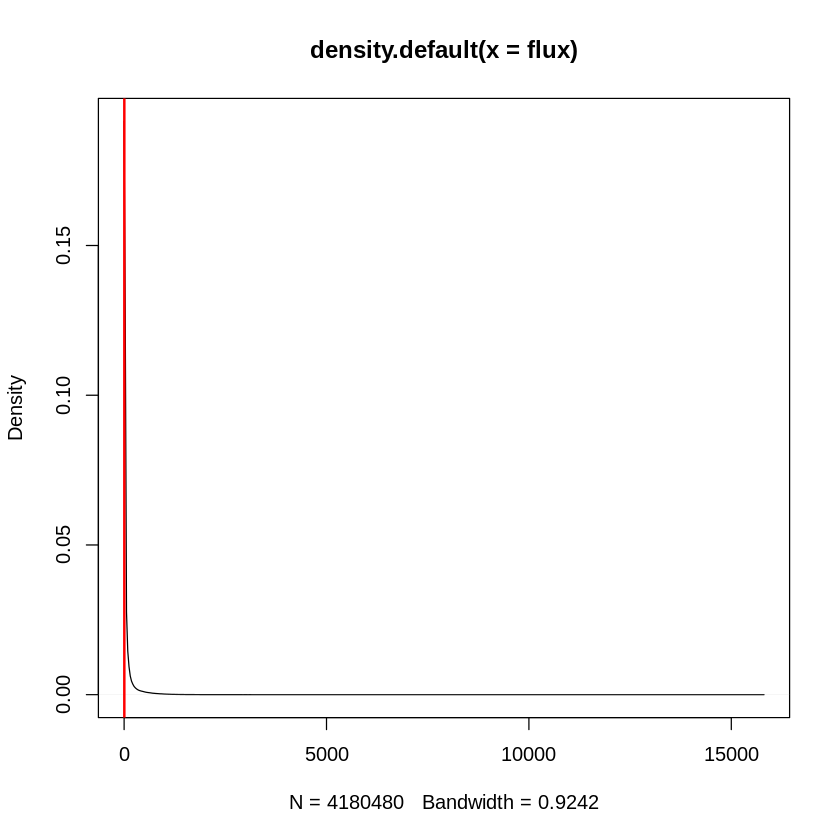

2.5%   97.5% 
  0.023 480.000

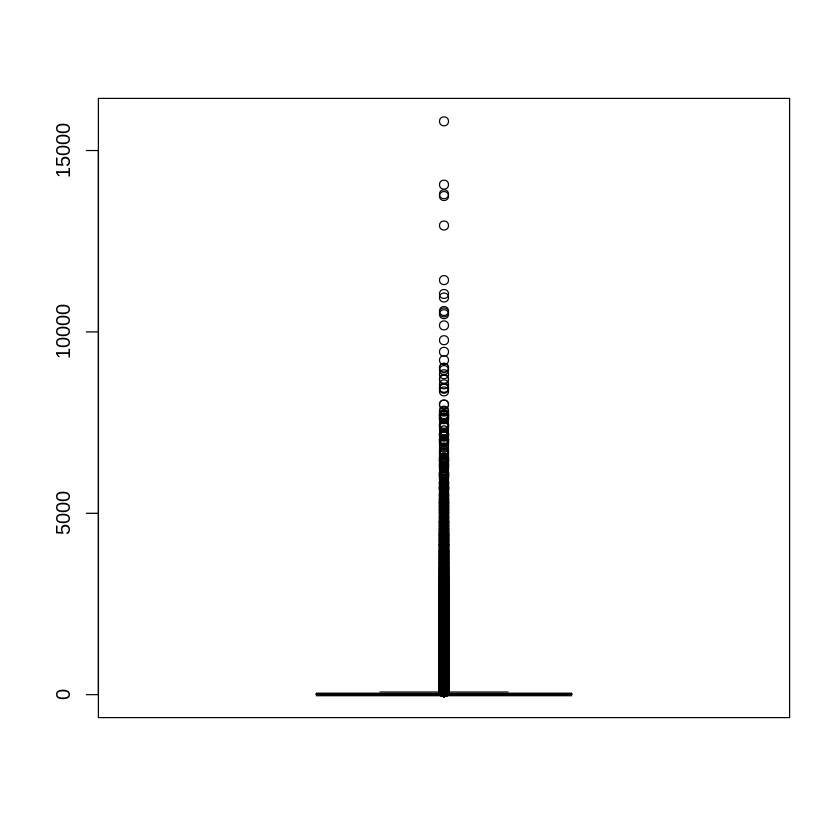

In [37]:
#Density plot for flux
#plot(density(flux))
#abline(v = median(flux), col = "red", lw = 2)

#Boxplot
boxplot(flux)

#95% confidence interval
quantile(flux, prob = c(0.025, 0.975), na.rm = TRUE)

As seen from the plots, the distribution has a very long tail, with most observations close to zero. The 2.5% percentile for flux is of 0.023 and the 97.5% is 480. The observations above this interval should be further explored to evaluate if they are extreme events and in which conditions. For example, there is the defrost of the Andes, which would affect the flux. Another important insight is that, as Chile has a diverse climate, when aggregating all data, it can difficult the assessment. 

2.5%    97.5% 
 0.00000 28.72424

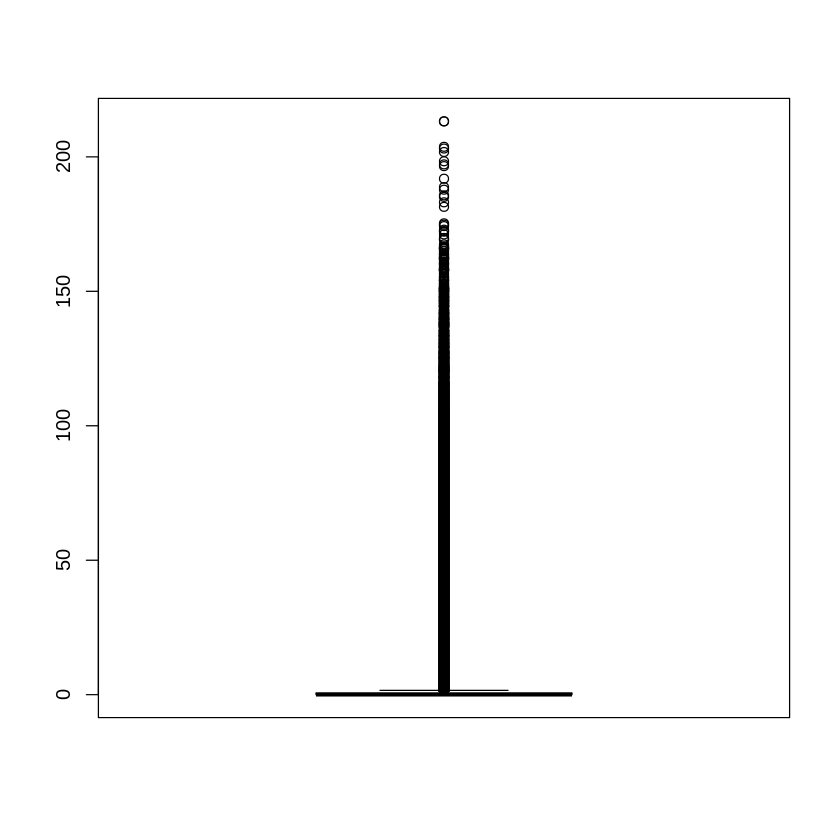

In [44]:
#Density plot for precip
#plot(density(precip))
#abline(v = median(precip), col = "red", lw = 2)

#Boxplot
boxplot(precip)

#95% confidence interval
quantile(precip, prob = c(0.025, 0.975), na.rm = TRUE)

As already indicate, the boxplot shows that the distribution for precip is highly skewed. The 2.5% is 0 and the 97.5% is 28.72. Once again, values above the interval should be further analysed.  

2.5%     97.5% 
 1.291753 27.119714

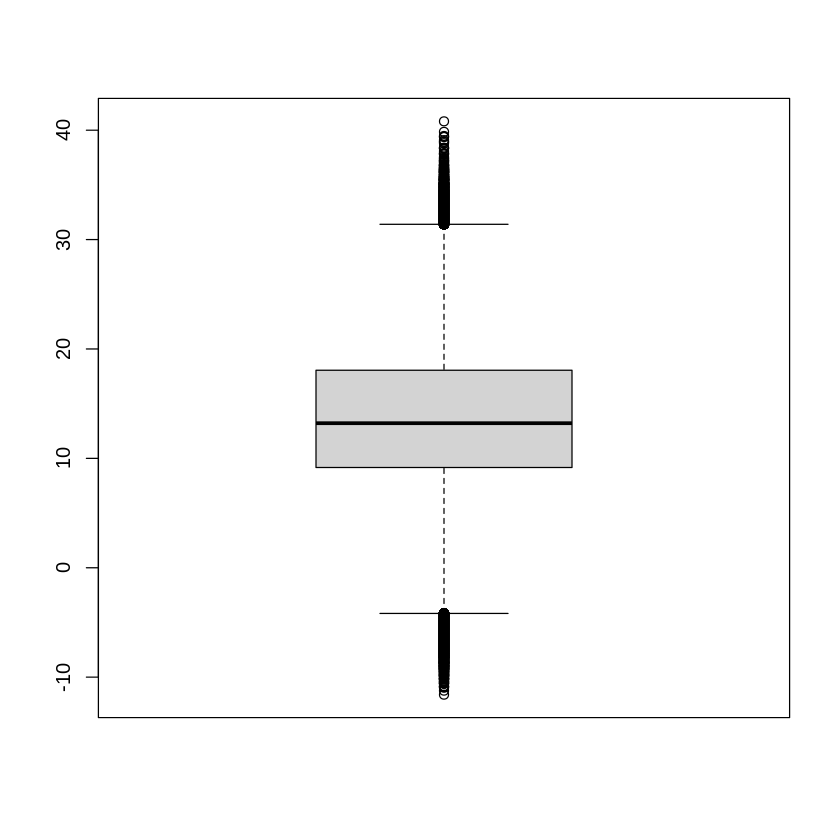

In [45]:
#Density plot for temp_max
#plot(density(temp_max))
#abline(v = median(temp_max), col =  "red", lw = 2)

#Boxplot
boxplot(temp_max)

#95% confidence interval
quantile(temp_max, prob = c(0.025, 0.975), na.rm = TRUE)

In terms of temperature, the boxplot shows a symmetrical curve with long tails. Again, this values should be further analysed by season and by region, for example. The 2.5% percentile is of 1.29 and the 97.5% is 27.12.

2.5%       97.5% 
   75.73329 14121.32385

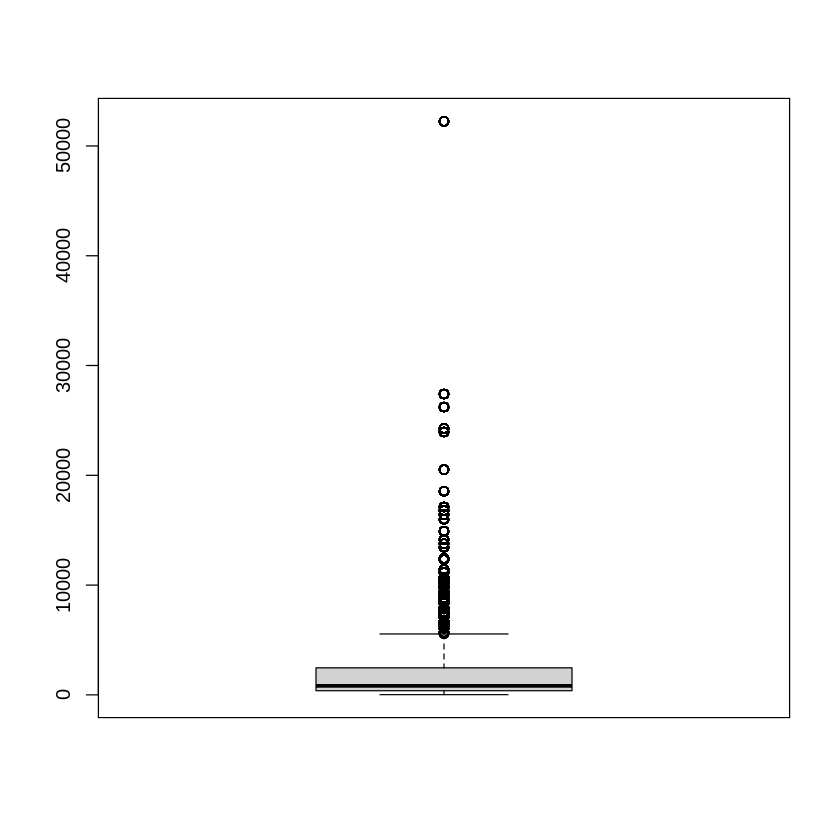

In [46]:
#Density plot for area_km2
#plot(density(area_km2))
#abline(v = median(area_km2), col = "red", lw = 2)

#Boxplot
boxplot(area_km2)

#95% confidence interval
quantile(area_km2, prob = c(0.025, 0.975), na.rm = TRUE)

There is a great variance of the size of the areas observed, as can be seen by the long tail in the boxplot. The 2.5% percentile is 75.72 km² and the 97.5% is 14121 km². This could be discussed with a specialist to understand why the regions chosen vary so much. This could be due to a special interest in some region (bigger area segmentation) or due to the bigger or smaller presence of rivers in certain regions.

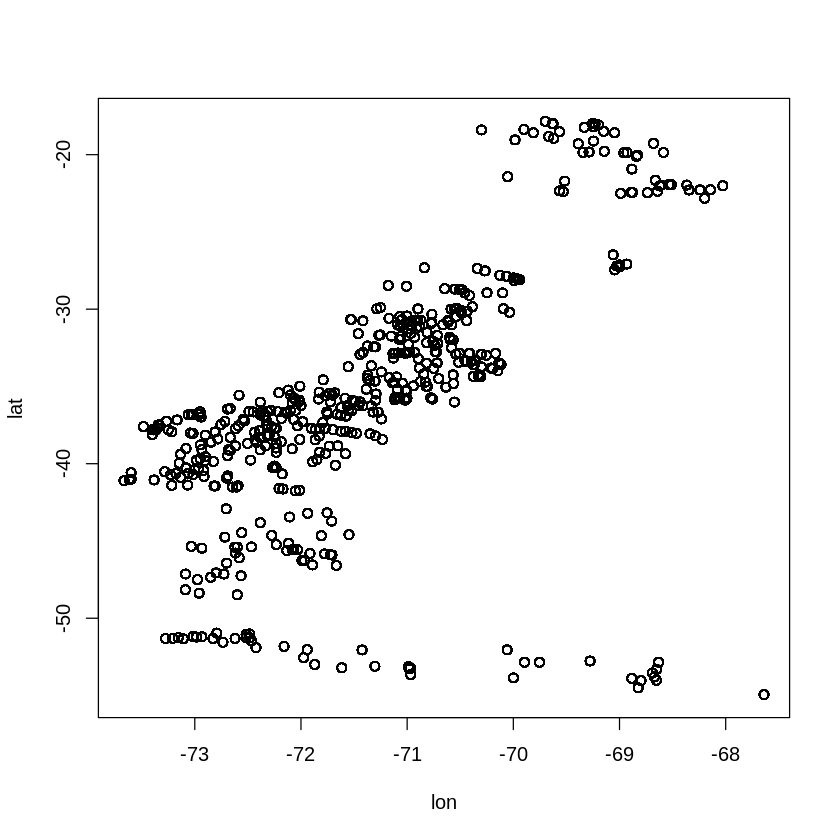

In [56]:
#Scatter plot of longitute by latitute
plot(lon, lat)

From the scatter plot, it can be seen there are some stations close to each other. This could be due to being in the same watershed. The data could be grouped by watershed instead of by river. 

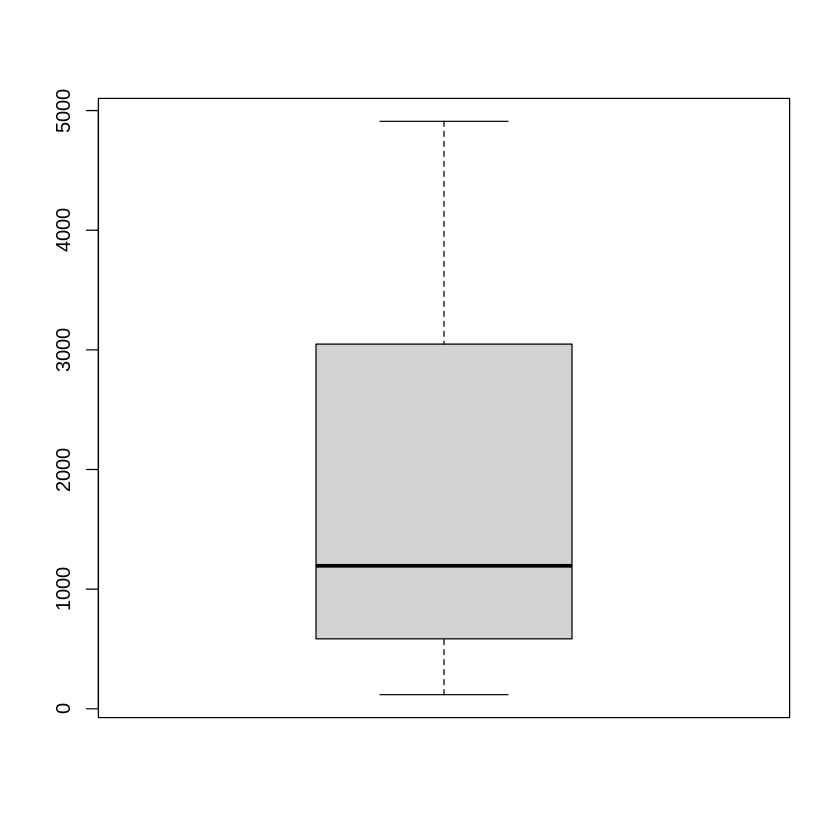

In [57]:
#Boxplot 
boxplot(mean_elev)

From the boxplot of elevation, the curve has a longer tail towards higher elevations. 

#Data Series

The next step is to visualise the data in terms of the dates. This is done for flux, temperature and precipitations.

null device 
          1

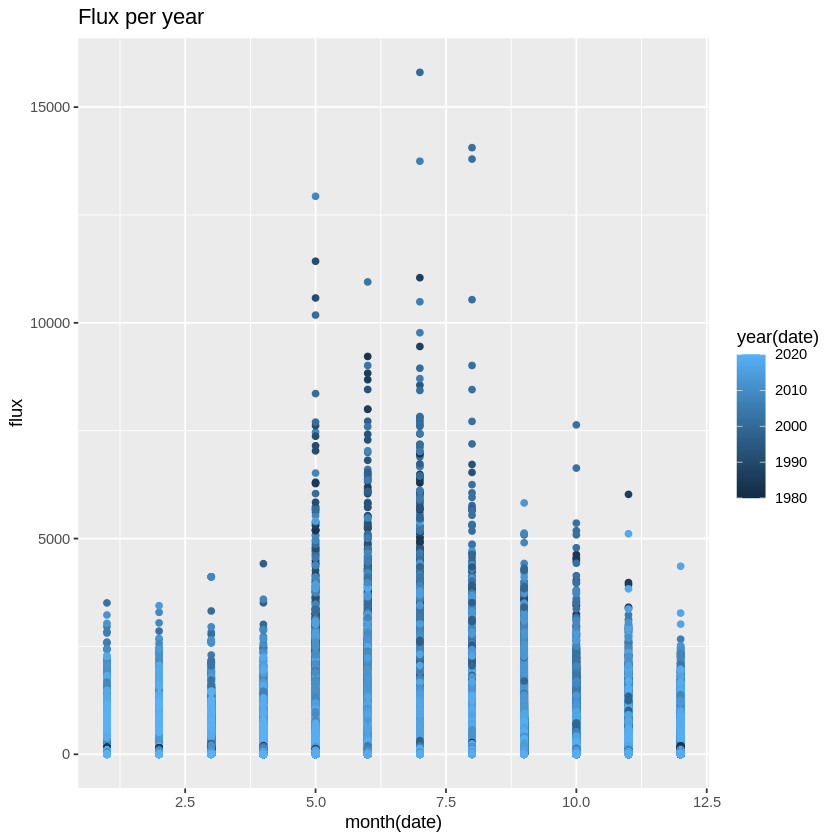

In [73]:
library(lubridate)

ggplot(watershed) +
  geom_point(aes(x = month(date), y = flux, color = year(date))) +
  ggtitle ("Flux per year ")  
dev.off()

It can be seem from the plot that from May to August is a season with higher flux overall.

null device 
          1

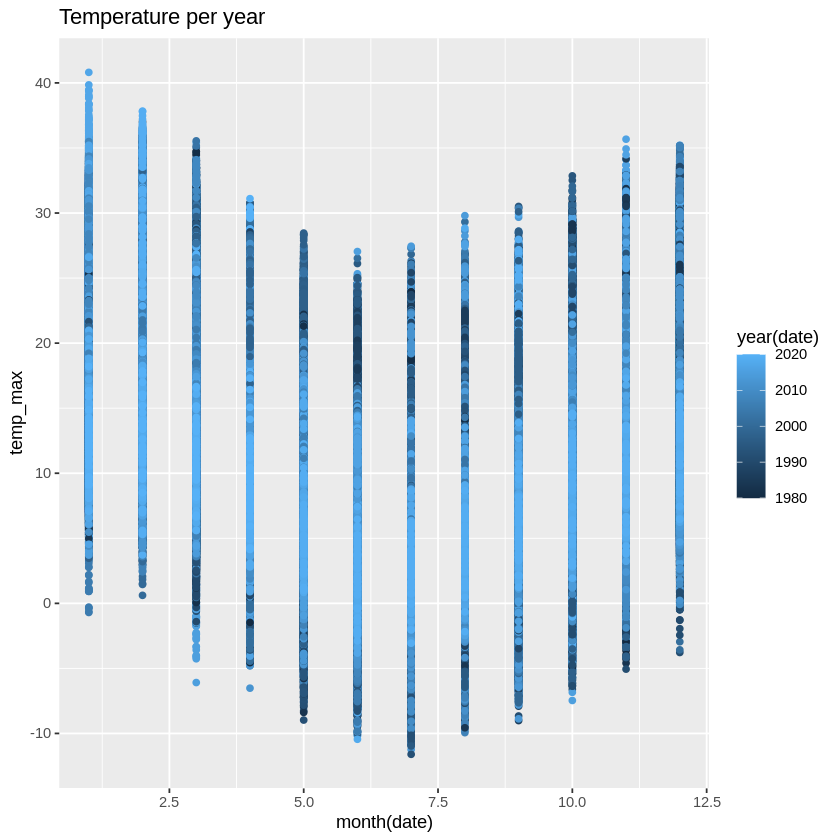

In [74]:
ggplot(watershed) +
  geom_point(aes(x = month(date), y = temp_max, color = year(date))) +
  ggtitle ("Temperature per year ")  
dev.off()

As expected, colder months are June and July due to winter season and hotter months are January and December due to summer season.

null device 
          1

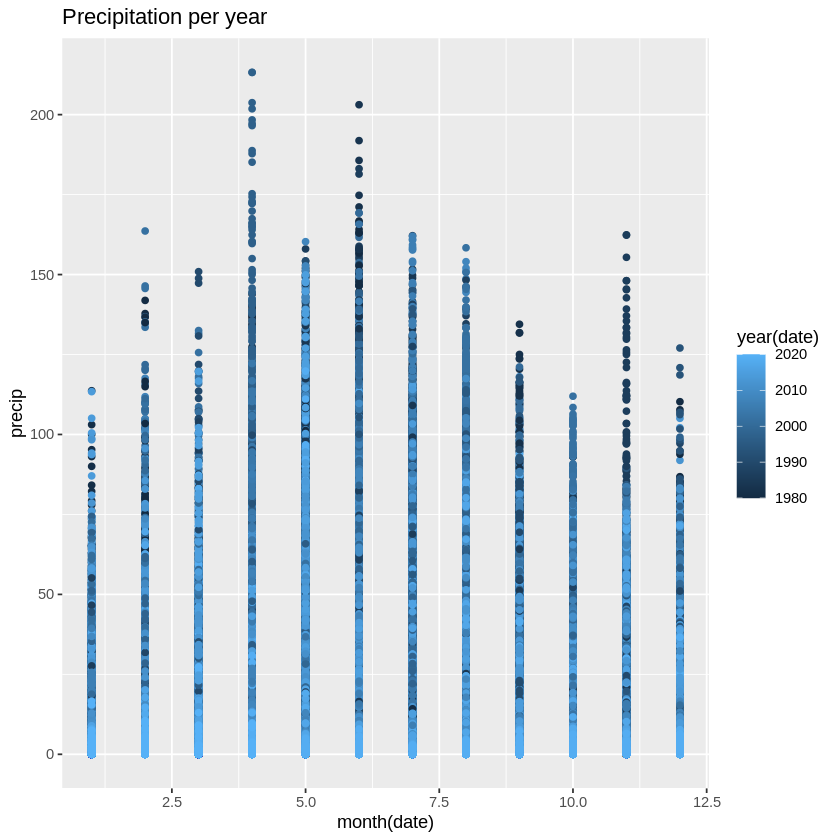

In [75]:
ggplot(watershed) +
  geom_point(aes(x = month(date), y = precip, color = year(date))) +
  ggtitle ("Precipitation per year ")  
dev.off()

The months with higher precipitation are April and June. 

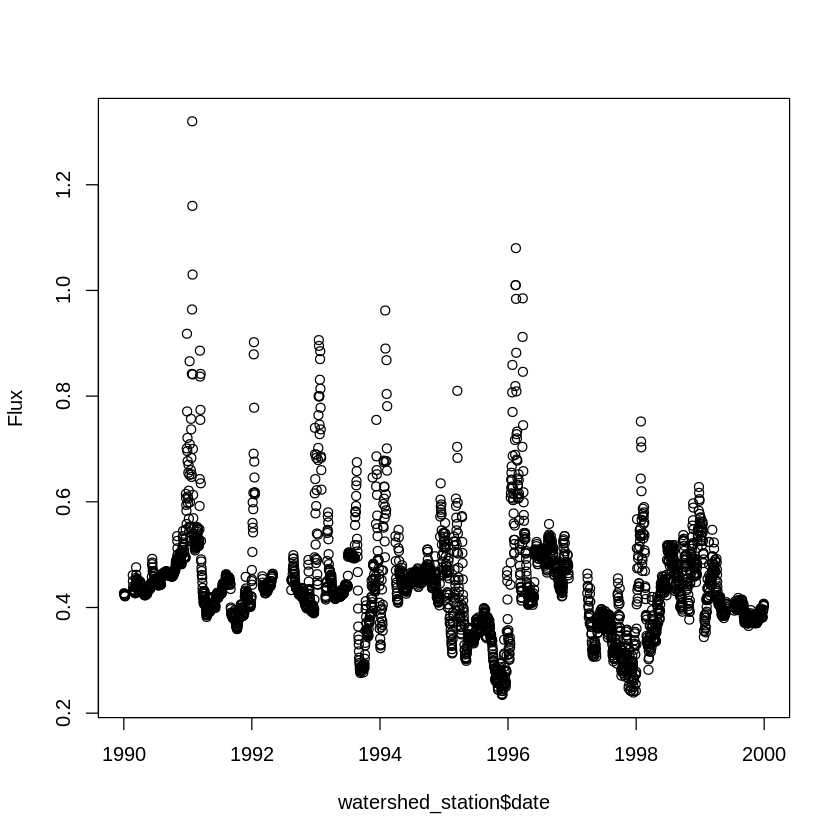

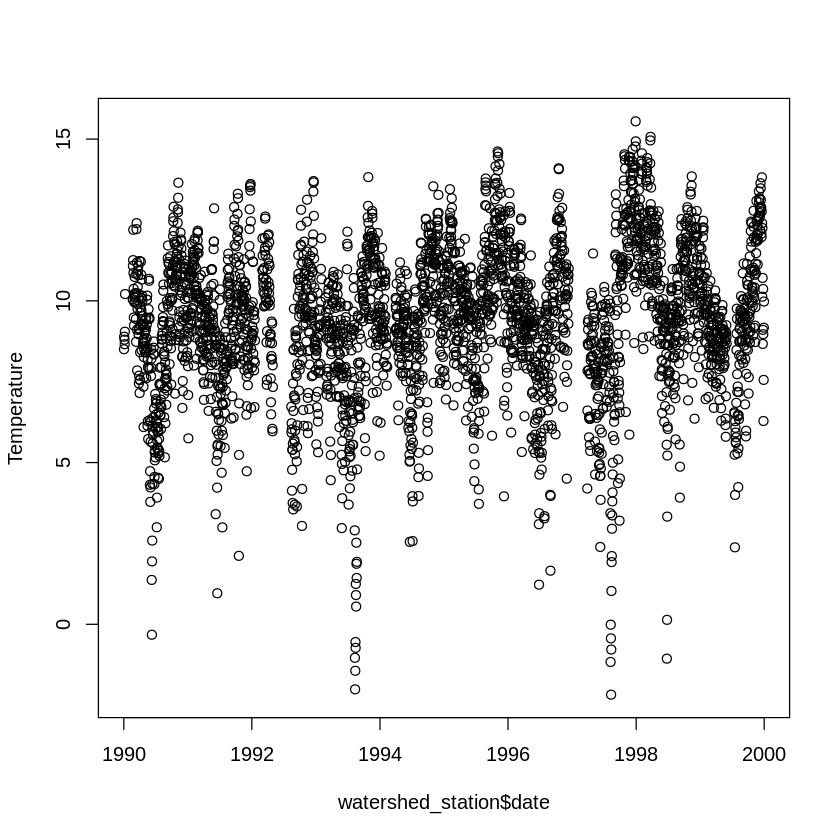

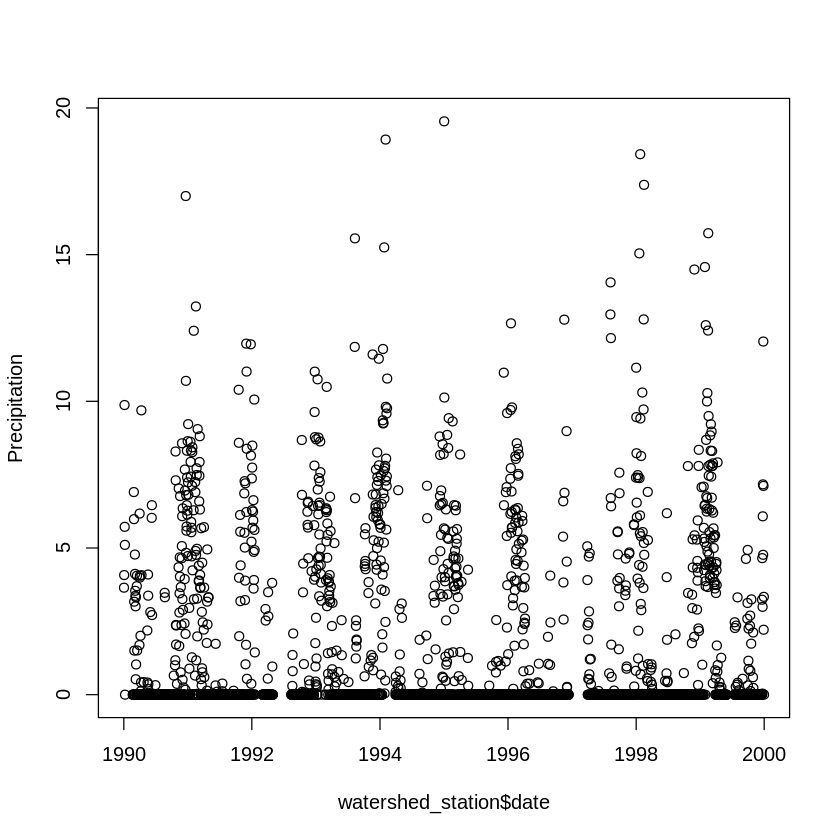

In [152]:
#Plot a time series of a specific variable from a station

watershed_station <- filter(watershed, gauge_name == "Rio Caquena En Nacimiento" & date > "1990-01-01" & date < "2000-01-01")
plot(watershed_station$date, watershed_station$flux, ylab =  "Flux")
plot(watershed_station$date, watershed_station$temp_max, ylab = "Temperature")
plot(watershed_station$date, watershed_station$precip, ylab = "Precipitation")


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”


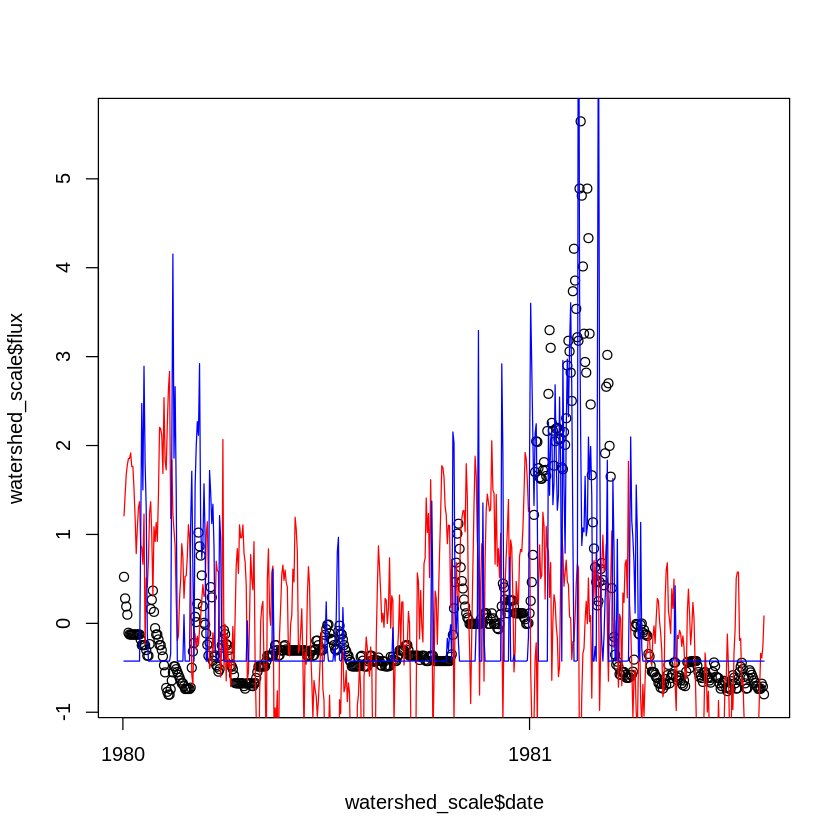

In [93]:
#Plot all variables at the same time

#scale the data
watershed_scale <- watershed_station %>% mutate_each_(list(~scale(.) %>% as.vector),
                                  vars = c("flux","temp_max", "precip"))


plot(watershed_scale$date, watershed_scale$flux)
lines(watershed_scale$date, watershed_scale$temp_max, col = "red", add =  TRUE)
lines(watershed_scale$date, watershed_scale$precip, col = "blue", add = TRUE)



#Extreme values

To analyse the occurence of extreme events, the data set created in the previous section (watershed_station) will be used.

In [ ]:
#Sets seasons

watershed2 <- watershed_station
watershed2[ , 'season'] <- NA

str(watershed2)


In [155]:
for (i in 1:nrow(watershed2)){

if (month(watershed2$date[i]) == 1 | month(watershed2$date[i]) == 2 | month(watershed2$date[i]) == 3) {watershed2$season[i] <- "Summer"}
if (month(watershed2$date[i]) == 4 | month(watershed2$date[i]) == 5 | month(watershed2$date[i]) == 6) {watershed2$season[i] <- "Fall"}
if (month(watershed2$date[i]) == 7 | month(watershed2$date[i]) == 8 | month(watershed2$date[i]) == 9) {watershed2$season[i] <- "Winter"}
if (month(watershed2$date[i]) == 10 | month(watershed2$date[i]) == 11 | month(watershed2$date[i]) == 12) {watershed2$season[i] <- "Spring"}

}

watershed2

date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season
<date>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1990-01-02,1001001,0.427,3.6470229,8.502862,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-01-03,1001001,0.425,4.0768038,8.891397,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-01-05,1001001,0.425,9.8737308,8.797206,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-01-06,1001001,0.424,5.7206691,8.657982,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-01-07,1001001,0.422,5.1064069,9.045199,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-01-08,1001001,0.421,0.0000000,10.209039,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-02-21,1001001,0.461,0.0000000,10.043833,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-02-22,1001001,0.450,0.0000000,11.081204,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer
1990-02-23,1001001,0.440,0.0000000,11.257906,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer


Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”


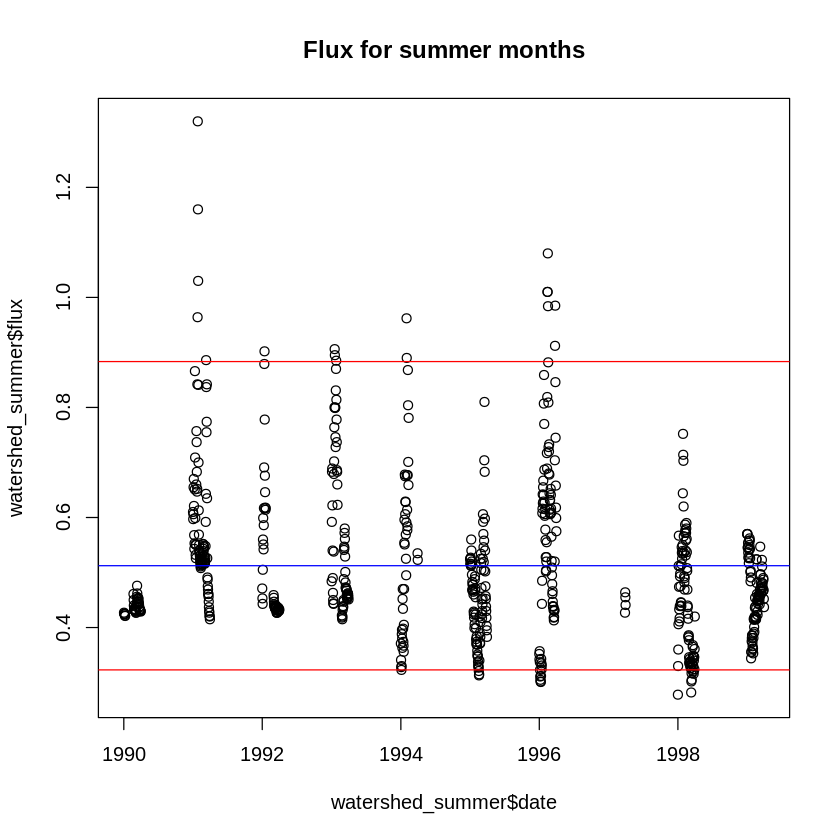

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”


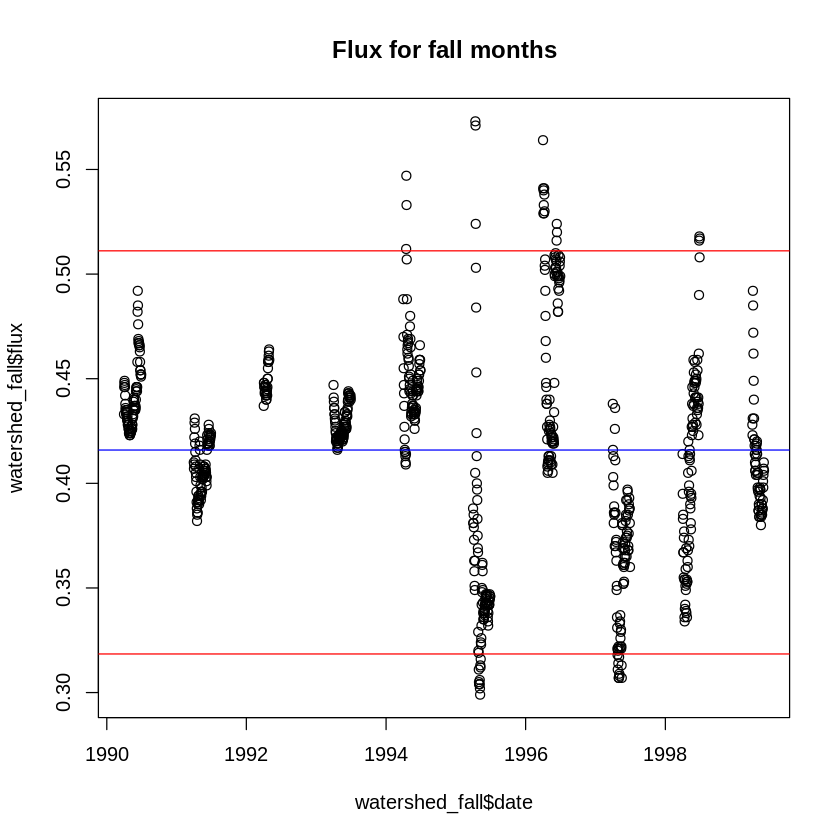

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”


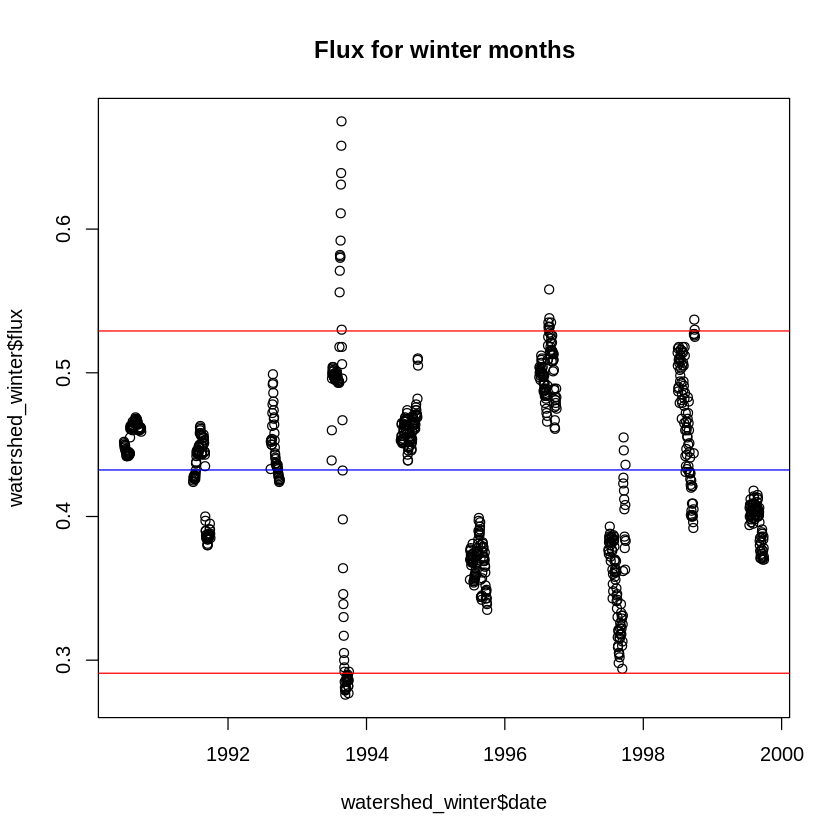

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"na.rm" is not a graphical parameter”


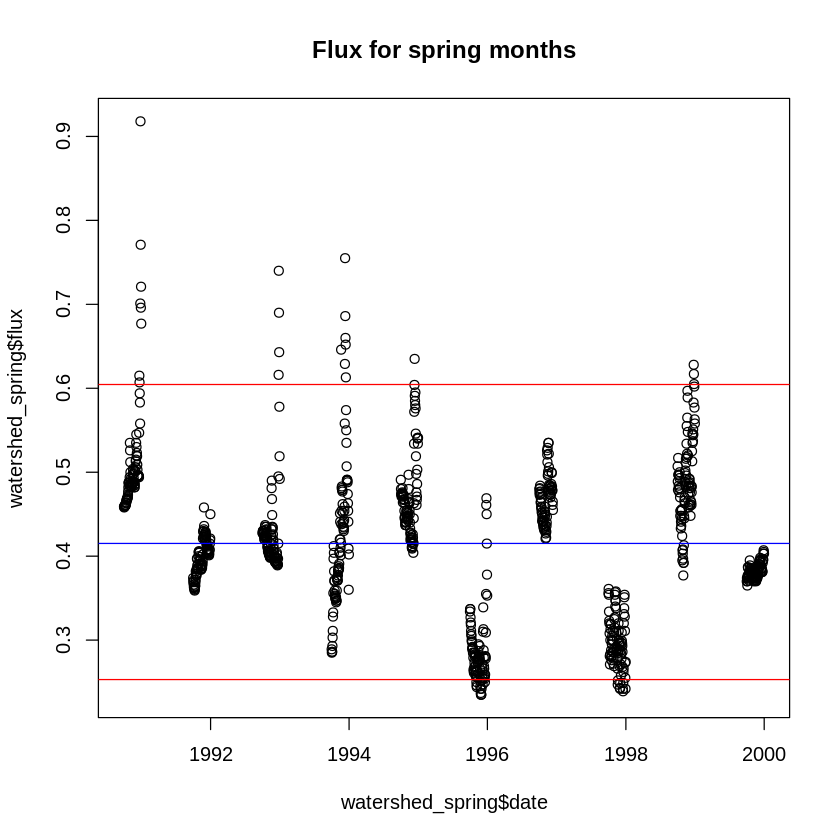

In [159]:
watershed_summer <- filter(watershed2, watershed2$season == "Summer")

plot(watershed_summer$date, watershed_summer$flux, main = "Flux for summer months")
abline(h = mean(watershed_summer$flux), col = "blue")
abline(h = quantile(watershed_summer$flux, prob = c(0.025)), col = "red", na.rm = TRUE)
abline(h = quantile(watershed_summer$flux, prob = c(0.975)), col = "red", na.rm = TRUE)

watershed_fall <- filter(watershed2, watershed2$season == "Fall")

plot(watershed_fall$date, watershed_fall$flux, main = "Flux for fall months")
abline(h = mean(watershed_fall$flux), col = "blue")
abline(h = quantile(watershed_fall$flux, prob = c(0.025)), col = "red", na.rm = TRUE)
abline(h = quantile(watershed_fall$flux, prob = c(0.975)), col = "red", na.rm = TRUE)

watershed_winter <- filter(watershed2, watershed2$season == "Winter")

plot(watershed_winter$date, watershed_winter$flux, main = "Flux for winter months")
abline(h = mean(watershed_winter$flux), col = "blue")
abline(h = quantile(watershed_winter$flux, prob = c(0.025)), col = "red", na.rm = TRUE)
abline(h = quantile(watershed_winter$flux, prob = c(0.975)), col = "red", na.rm = TRUE)

watershed_spring <- filter(watershed2, watershed2$season == "Spring")

plot(watershed_spring$date, watershed_spring$flux, main = "Flux for spring months")
abline(h = mean(watershed_spring$flux), col = "blue")
abline(h = quantile(watershed_spring$flux, prob = c(0.025)), col = "red", na.rm = TRUE)
abline(h = quantile(watershed_spring$flux, prob = c(0.975)), col = "red", na.rm = TRUE)

The plots for the indicate the values of water flux for each season between 1990 and 2000 for the river Rio Caquena En Nacimiento. The blue line represents the overall mean and the red lines indicate the 2.5% and 97.5% percentile, in order to indicate points at the tails of the distributions. The same is should be done for temperature and precipitation.

In [163]:
watershed3 <- watershed_summer
watershed3[ , 'flux_extreme'] <- NA
watershed3[ , 'temp_extreme'] <- NA
watershed3[ , 'precip_extreme'] <- NA

for (i in 1:nrow(watershed3)){

if (watershed3$flux[i] > quantile(watershed3$flux, prob = c(0.975))) {watershed3$flux_extreme[i] <- 1} 
if (watershed3$flux[i] < quantile(watershed3$flux, prob = c(0.975))) {watershed3$flux_extreme[i] <- 0} 
if (watershed3$temp_max[i] > quantile(watershed3$temp_max, prob = c(0.975))) {watershed3$temp_extreme[i] <- 1} 
if (watershed3$temp_max[i] < quantile(watershed3$temp_max, prob = c(0.975))) {watershed3$temp_extreme[i] <- 0} 
if (watershed3$precip[i] > quantile(watershed3$precip, prob = c(0.975))) {watershed3$precip_extreme <- 1} 
if (watershed3$temp_max[i] < quantile(watershed3$temp_max, prob = c(0.975))) {watershed3$temp_extreme[i] <- 0} 

}



date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season,flux_extreme,temp_extreme,precip_extreme
<date>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1990-01-02,1001001,0.427,3.6470229,8.502862,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-01-03,1001001,0.425,4.0768038,8.891397,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-01-05,1001001,0.425,9.8737308,8.797206,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-01-06,1001001,0.424,5.7206691,8.657982,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-01-07,1001001,0.422,5.1064069,9.045199,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-01-08,1001001,0.421,0.0000000,10.209039,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-02-21,1001001,0.461,0.0000000,10.043833,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-02-22,1001001,0.450,0.0000000,11.081204,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1
1990-02-23,1001001,0.440,0.0000000,11.257906,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449,49.71186,Summer,0,0,1


Then, new variables are created to indicate extreme events for flux, temperature and precipitation. This is set as any observation that is above the 97.5% percentil is considered extreme. As a indication, this could be a good solution, because it considers only the events at the end right tail of the distribution. However, something to be noted, is that Chile is greatly affected by El Niño and La Niña. Therefore, in years which those events take place, special attention should be done.

Next, different watershed should be compared. The river Rio Robalo En Puerto Williams is chosen and, therefore, the previous analysis are done for it.

In [ ]:
#Rio Caquena En Vertedero

watershed_station2 <- filter(watershed, gauge_name == "Rio Caquena En Vertedero" & date > "1990-01-01" & date < "2000-01-01")

watershed_caquena <- watershed_station2
watershed_caquena[ , 'season'] <- NA

for (i in 1:nrow(watershed_caquena)){

if (month(watershed_caquena$date[i]) == 1 | month(watershed_caquena$date[i]) == 2 | month(watershed_caquena$date[i]) == 3) {watershed_caquena$season[i] <- "Summer"}
if (month(watershed_caquena$date[i]) == 4 | month(watershed_caquena$date[i]) == 5 | month(watershed_caquena$date[i]) == 6) {watershed_caquena$season[i] <- "Fall"}
if (month(watershed_caquena$date[i]) == 7 | month(watershed_caquena$date[i]) == 8 | month(watershed_caquena$date[i]) == 9) {watershed_caquena$season[i] <- "Winter"}
if (month(watershed_caquena$date[i]) == 10 | month(watershed_caquena$date[i]) == 11 | month(watershed_caquena$date[i]) == 12) {watershed_caquena$season[i] <- "Spring"}

}


watershed_summer_caquena <- filter(watershed_caquena, watershed_caquena$season == "Summer")

watershed_caquena2 <- watershed_summer_caquena
watershed_caquena2[ , 'flux_extreme'] <- NA


for (i in 1:nrow(watershed_caquena2)){

if (watershed_caquena2$flux[i] > quantile(watershed_caquena2$flux, prob = c(0.975))) {watershed_caquena2$flux_extreme[i] <- 1} 
if (watershed_caquena2$flux[i] < quantile(watershed_caquena2$flux, prob = c(0.975))) {watershed_caquena2$flux_extreme[i] <- 0} 

}




Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”


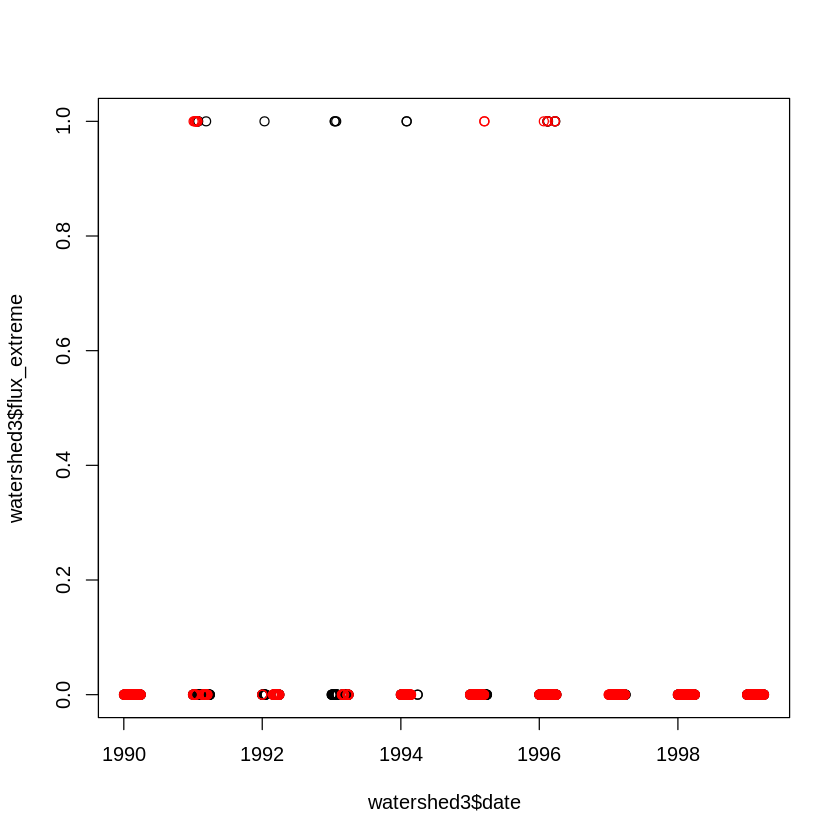

In [169]:
#Compare both rivers

plot(watershed3$date, watershed3$flux_extreme)
points(watershed_caquena2$date, watershed_caquena2$flux_extreme, col = "red", add = TRUE)

The river Rio Caquena En Nacimiento, shown in black, and the river Rio Caquena En Vertedero, shown in red, seems to have different behaviors for the summers between 1990 and 2000. While between 1991 and 1994, En Nascimento seems to systematically have had extreme events, En Vertedero had occurences in 1991 and then only in 1995 and 1996. These should be further investigated.  

The next step would be to determine the percentage of extreme events. For that, all extreme events should be determined for the 40 years period available. Then, by year, by season and by river, the percentage of extreme events should be obtained by taking the number of extreme events and dividing by the total of the given period. Due to climate changes and increasing urbanization, it should be seem an increase in the number of occurences. 

Finally, in order to help predict new occurences of extreme events, a time series algorithm should be trained. 